<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>
<br />
Олеся, доброго дня! рад приветствовать тебя в финале) <br />
Вот и он подобрался, поздравляю. Остался последний рывок в этом марафоне)<br>
<br />
Меня зовут Николай. <br />И на этом этапе Вашего движения к новой профессии от меня будут комментарии по написанному коду. <br />Чтобы меньше "мусорить эфир" и чтобы максимально наглядно отделяться от основного кода, есть предложение условиться в некоторых обозначениях:<br /> <br />
<u><b>ТАКОЙ ШРИФТ</b></u> - всегда начало комментария <br />
<font color='green'>такой шрифт</font> - комментарии о том, что всё ОК <br/>
<font color='purple'>такой шрифт</font> - комментарии о том, что всё ОК по результату,<br> однако что есть ещё что-то или в коде или есть способы сделать более короткий или быстрый код <br/>
<font color='red'>такой шрифт</font> - комментарии о том, что есть критичный момент, влияющий на бизнес-результат проекта.<br/>
</font><br /><br />
<font color='green'>Как и всегда в спринтах - ставлю своей целью максимально помочь. Поэтому, все мои комментарии - это только способ передать свой опыт для помощи в твоих достижениях.

# Прогнозирование оттока клиентов

Для того, чтобы удержать клиентов, которые планируют уйти, с помощью промокодов и специальных условий необходимо создать модель для прогнозирования оттока клиентов.
<br>

**Цель:** построить модель для прогнозирования оттока клиентов.

**Задачи:**
<br>1.Изучить исходные данные и выполнить их предобработку.
<br>2.Выбор модели машинного обучения.
<br>3.Выбор оптимальных гиперпараметров для модели.
<br>4.Сделать общий вывод.

**Описание услуг**<br>

Оператор предоставляет два основных типа услуг: 
<br>
1. Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
2. Интернет. Подключение может быть двух типов: через телефонную линию (DSL*,* от англ. *digital subscriber line*, «цифровая абонентская линия») или оптоволоконный кабель (*Fiber optic*).  
<br>

Также доступны такие услуги:
<br>
- Интернет-безопасность: антивирус (*DeviceProtection*) и блокировка небезопасных сайтов (*OnlineSecurity*);
- Выделенная линия технической поддержки (*TechSupport*);
- Облачное хранилище файлов для резервного копирования данных (*OnlineBackup*);
- Стриминговое телевидение (*StreamingTV*) и каталог фильмов (*StreamingMovies*).
<br>
За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.
<br>

**Описание данных**

<br>
Данные состоят из файлов, полученных из разных источников:
<br>
- contract.csv — информация о договоре;<br>
- personal.csv — персональные данные клиента;<br>
- internet.csv — информация об интернет-услугах;<br>
- phone.csv — информация об услугах телефонии.

## Предобработка данных

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from catboost import cv
import lightgbm as lgb
import warnings
warnings.filterwarnings('ignore')

### Personal

Начнем предобработку с таблицы, содержащей персональные данные клиентов.

In [3]:
personal = pd.read_csv('/datasets/final_provider/personal.csv')
personal.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [4]:
personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


### Contract

Аналогично выполним преобразования с таблицей, содержащей информацию о договорах.

In [5]:
contract = pd.read_csv('/datasets/final_provider/contract.csv')
contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


In [6]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [7]:
len(contract.customerID.unique())

7043

In [8]:
contract.shape

(7043, 8)

Поскольку общее количество клиентов совпадает с количеством уникальных значений, значит клиенты в таблице не повторяются.

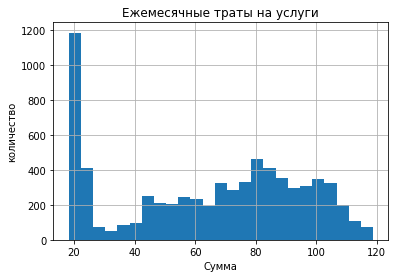

In [9]:
contract.MonthlyCharges.hist(bins = 25).set(title = "Ежемесячные траты на услуги", xlabel = 'Сумма', 
                            ylabel = 'количество');

Наибольшее количество клиентов ежемесячно тратит на услуги около 20, наименьшее - от 30 до 40.

### Internet

In [10]:
internet = pd.read_csv('/datasets/final_provider/internet.csv')
internet.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [11]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


### Phone

In [12]:
phone = pd.read_csv('/datasets/final_provider/phone.csv')
phone.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [13]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>И на месте первичный аналитический осмотр. Процедура обыденная. Но позволяет сгенерировать много идей для моедлирования

### Итоговая таблица

Из подготовленных выше таблиц получим одну таблицу.

In [14]:
data = personal.merge(contract, how='outer', on = 'customerID')
data = data.merge(internet, how='outer', on = 'customerID')
data = data.merge(phone, how='outer', on = 'customerID')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,Female,0,Yes,No,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,Male,0,No,No,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,Male,0,No,No,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,Male,0,No,No,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,Female,0,No,No,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Fiber optic,No,No,No,No,No,No,No


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   BeginDate         7043 non-null   object 
 6   EndDate           7043 non-null   object 
 7   Type              7043 non-null   object 
 8   PaperlessBilling  7043 non-null   object 
 9   PaymentMethod     7043 non-null   object 
 10  MonthlyCharges    7043 non-null   float64
 11  TotalCharges      7043 non-null   object 
 12  InternetService   5517 non-null   object 
 13  OnlineSecurity    5517 non-null   object 
 14  OnlineBackup      5517 non-null   object 
 15  DeviceProtection  5517 non-null   object 
 16  TechSupport       5517 non-null   object 


<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>Есть контакт)

In [16]:
data.index.duplicated().sum()

0

Преобразуем переменные BeginDate и EndDate в формат даты.

In [17]:
data['BeginDate']=pd.to_datetime(data['BeginDate'],format = '%Y-%m-%d')

In [18]:
data['EndDate']=pd.to_datetime(data.loc[data['EndDate'] != 'No','EndDate'],format = '%Y-%m-%dT%H:%M:%S')

Пропуски в переменной TotalCharges заполним значениями из MonthlyCharges.

In [19]:
data.loc[data['TotalCharges'] == ' ', 'TotalCharges'] = data['MonthlyCharges']
data['TotalCharges'] = data['TotalCharges'].astype('float')

Заполним значением 'active' в EndDate по дйдствующим контрактам.

In [20]:
data['EndDate'].fillna('active',inplace = True)

Добавим столбец с целевой переменной, где 1 - пользователь ушел, 0 - действующий пользователь.

In [21]:
data['Churn'] = 1
data.loc[data['EndDate'] == 'active', 'Churn'] = 0

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>ОК.

Изучим распределение целевой переменной.

0    73.0
1    27.0
Name: Churn, dtype: float64 



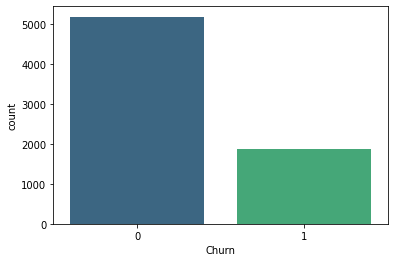

In [22]:
print(round(data['Churn'].value_counts(normalize=True)*100), "\n")
sns.countplot(x='Churn', data=data, palette="viridis");

По полученному графику видно, что целевая переменная распределена неравномерно, доля ушедших клиентов составляет 27%. Это будет необходимо учесть при построении модели, чтобы добиться более высокого качества прогноза.

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>Да, разбаланс виден. Чаще всего границу принимают на уровне 0.25-0.30 , всё, что ниже - однозначно в балансировку). А так - на усмотрение аналитика. А вот график - интересно вывелся)))))

In [41]:
df = data

Закодируем бинарные переменные.

In [42]:
df['MultipleLines'] = pd.Series(np.where(df['MultipleLines'].values == 'Yes', 1, 0),df.index)
df['Dependents'] = pd.Series(np.where(df['Dependents'].values == 'Yes', 1, 0),df.index)
df['Partner'] = pd.Series(np.where(df['Partner'].values == 'Yes', 1, 0),df.index)
df['gender'] = pd.Series(np.where(df['gender'].values == 'Female', 1, 0),df.index)
df['StreamingMovies'] = pd.Series(np.where(df['StreamingMovies'].values == 'Yes', 1, 0),df.index)
df['StreamingTV'] = pd.Series(np.where(df['StreamingTV'].values == 'Yes', 1, 0),df.index)
df['TechSupport'] = pd.Series(np.where(df['TechSupport'].values == 'Yes', 1, 0),df.index)
df['DeviceProtection'] = pd.Series(np.where(df['DeviceProtection'].values == 'Yes', 1, 0),df.index)
df['OnlineBackup'] = pd.Series(np.where(df['OnlineBackup'].values == 'Yes', 1, 0),df.index)
df['OnlineSecurity'] = pd.Series(np.where(df['OnlineSecurity'].values == 'Yes', 1, 0),df.index)
df['PaperlessBilling'] = pd.Series(np.where(df['PaperlessBilling'].values == 'Yes',1,0),df.index)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   gender            7043 non-null   int64         
 2   SeniorCitizen     7043 non-null   int64         
 3   Partner           7043 non-null   int64         
 4   Dependents        7043 non-null   int64         
 5   BeginDate         7043 non-null   datetime64[ns]
 6   EndDate           7043 non-null   object        
 7   Type              7043 non-null   object        
 8   PaperlessBilling  7043 non-null   int64         
 9   PaymentMethod     7043 non-null   object        
 10  MonthlyCharges    7043 non-null   float64       
 11  TotalCharges      7043 non-null   float64       
 12  InternetService   5517 non-null   object        
 13  OnlineSecurity    7043 non-null   int64         
 14  OnlineBackup      7043 n

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>Согласен.

Закодируем категориальные переменные:

In [44]:
df = pd.get_dummies(df, columns = ['Type', 'InternetService','PaymentMethod'], drop_first = True)

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>
ОК.

Рассчитаем количество дней, которые клиент пользуется услугами компании:

In [45]:
df['EndDate'] = df['EndDate'].replace('active', '2020-02-01')

In [46]:
df['lasted'] = (pd.to_datetime(df['EndDate']) - df['BeginDate']).dt.days

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>
ИНтересный фактор, ОК.

In [47]:
df.rename({'lasted': 'duration'}, axis=1, inplace=True)

Для того, чтобы не произошло утечки данных удалим переменные BeginDate, EndDate.

In [48]:
df = df.drop(columns = ['BeginDate', 'EndDate', 'customerID'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   PaperlessBilling                       7043 non-null   int64  
 5   MonthlyCharges                         7043 non-null   float64
 6   TotalCharges                           7043 non-null   float64
 7   OnlineSecurity                         7043 non-null   int64  
 8   OnlineBackup                           7043 non-null   int64  
 9   DeviceProtection                       7043 non-null   int64  
 10  TechSupport                            7043 non-null   int64  
 11  Stre

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>
ОТЛИЧНО, что удаляешь факторы-даты!!!!! Если у нас тема НЕ временные ряды, то такие факторы лучше не использовать. Они "нагонят" метрики, но бизнес-эффективность модели  - рухнет.

In [23]:
#sns.set(rc = {'figure.figsize':(20,20)})
#sns.heatmap(data.corr(), annot = True)
#sns.set(font_scale=200)

<div class="alert alert-warning" style="border-color: darkorange; border-radius: 5px">
    <p><u><b>⚠️ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>ОК, работа с мультиколлинеарностью - важна. Но есть важный момент по корреляциям: данная корреляция Спирмена/Пирсона - разрабатывался для количественных шкал. Если данные в бинарной шкале (пол, тип услуги....) - техника не подходит, лучше не опираться на данные выводы.<br>
    
Поэтому выводы можно делать только по количественным данным (в нашем случае - финансы и длительность контракта).

<dt>План работы:</dt>

1.Предобработка данных
1. Предварительный анализ данных,<br>
1. Категоризация переменных,<br>
1. Проверка на наличие дубликатов,<br>
1. Обработка пропусков.<br>

2.Выбор модели машинного обучения
1. SGDClassifier
1. DecisionTreeClassifier
1. RandomForest
1. XGBoost
1. LightGBM
1. CatBoost

3.Подбор гиперпараметров модели
1. Выбор гиперпараметров для модели, выбранной на втором этапе

4.Итоговый вывод

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>
Самое сложное - позади. Впереди только моделирование)

## Выбор модели

Разделим датасет на обучающую и тестовую выборки.

In [50]:
train_df, test_df = train_test_split(df, test_size = 0.2, random_state = 123)

In [51]:
features_train = train_df.drop('Churn', axis = 1)
features_test = test_df.drop('Churn', axis = 1)

target_train = train_df['Churn']
target_test = test_df['Churn']

Перейдем к построению моделей.

### SGDClassifier

In [52]:
%%time
model_sgd = linear_model.SGDClassifier(random_state = 1234)
model_sgd.fit(features_train, target_train)
result_train = model_sgd.predict(features_train)
result_test = model_sgd.predict(features_test)

CPU times: user 75.9 ms, sys: 42.2 ms, total: 118 ms
Wall time: 77.2 ms


In [53]:
models_results = []
columns = ['model', 'roc auc (train)', 'roc auc (test)', 'accuracy(train)', 'accuracy(test)', 'time']
models_results = pd.DataFrame(data = models_results, columns = columns)
models_results

,model,roc auc (train),roc auc (test),accuracy(train),accuracy(test),time


Добавим функцию, которая соберет информацию о полученных значениях метрики:

In [54]:
def result_model(name_model, time):
    roc_auc_train = roc_auc_score(target_train, result_train)
    accuracy_train = accuracy_score(target_train, result_train)
    roc_auc_test = roc_auc_score(target_test, result_test)
    accuracy_test = accuracy_score(target_test, result_test)
    models_results.loc[len(models_results)] = [name_model, roc_auc_train, roc_auc_test, accuracy_train, accuracy_test, time]
    return models_results

In [55]:
result_model('SGDClassifier', '61.6ms')

,model,roc auc (train),roc auc (test),accuracy(train),accuracy(test),time
0,SGDClassifier,0.598693,0.612993,0.760206,0.760114,61.6ms


### DecisionTreeClassifier

In [56]:
%%time
model_tree = tree.DecisionTreeClassifier(random_state = 1234)
model_tree.fit(features_train, target_train)
result_train = model_tree.predict(features_train)
result_test = model_tree.predict(features_test)

CPU times: user 29.8 ms, sys: 0 ns, total: 29.8 ms
Wall time: 28.3 ms


In [57]:
result_model('DecisionTreeClassifier', '35.1ms')

,model,roc auc (train),roc auc (test),accuracy(train),accuracy(test),time
0,SGDClassifier,0.598693,0.612993,0.760206,0.760114,61.6ms
1,DecisionTreeClassifier,0.997966,0.720867,0.998935,0.783534,35.1ms


### RandomForest

In [58]:
%%time
model_tree = RandomForestClassifier(random_state = 1234)
model_tree.fit(features_train, target_train)
result_train = model_tree.predict(features_train)
result_test = model_tree.predict(features_test)

CPU times: user 665 ms, sys: 15.9 ms, total: 680 ms
Wall time: 682 ms


In [59]:
result_model('RandomForestClassifier', '629ms')

,model,roc auc (train),roc auc (test),accuracy(train),accuracy(test),time
0,SGDClassifier,0.598693,0.612993,0.760206,0.760114,61.6ms
1,DecisionTreeClassifier,0.997966,0.720867,0.998935,0.783534,35.1ms
2,RandomForestClassifier,0.998185,0.726730,0.998935,0.815472,629ms


### XGBoost

In [60]:
%%time
model_tree = XGBClassifier(random_state = 1234)
model_tree.fit(features_train, target_train)
result_train = model_tree.predict(features_train)
result_test = model_tree.predict(features_test)

[11:54:47] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CPU times: user 60 s, sys: 681 ms, total: 1min
Wall time: 1min 2s


In [61]:
result_model('XGBClassifier', '4.78s')

,model,roc auc (train),roc auc (test),accuracy(train),accuracy(test),time
0,SGDClassifier,0.598693,0.612993,0.760206,0.760114,61.6ms
1,DecisionTreeClassifier,0.997966,0.720867,0.998935,0.783534,35.1ms
2,RandomForestClassifier,0.998185,0.726730,0.998935,0.815472,629ms
3,XGBClassifier,0.928719,0.805961,0.955804,0.865862,4.78s


### LightGBM

In [62]:
%%time
model_tree = LGBMClassifier(random_state = 1234)
model_tree.fit(features_train, target_train)
result_train = model_tree.predict(features_train)
result_test = model_tree.predict(features_test)

CPU times: user 1min 32s, sys: 1.04 s, total: 1min 33s
Wall time: 1min 35s


In [63]:
result_model('LGBMClassifier', '51.5s')

,model,roc auc (train),roc auc (test),accuracy(train),accuracy(test),time
0,SGDClassifier,0.598693,0.612993,0.760206,0.760114,61.6ms
1,DecisionTreeClassifier,0.997966,0.720867,0.998935,0.783534,35.1ms
2,RandomForestClassifier,0.998185,0.726730,0.998935,0.815472,629ms
3,XGBClassifier,0.928719,0.805961,0.955804,0.865862,4.78s
4,LGBMClassifier,0.873676,0.801303,0.921370,0.865862,51.5s


### CatBoost

In [64]:
%%time
model_tree = CatBoostClassifier(random_state = 1234)
model_tree.fit(features_train, target_train)
result_train = model_tree.predict(features_train)
result_test = model_tree.predict(features_test)

Learning rate set to 0.021554
0:	learn: 0.6783304	total: 51.5ms	remaining: 51.5s
1:	learn: 0.6635962	total: 54.6ms	remaining: 27.2s
2:	learn: 0.6502268	total: 57.7ms	remaining: 19.2s
3:	learn: 0.6376929	total: 61.4ms	remaining: 15.3s
4:	learn: 0.6276873	total: 64ms	remaining: 12.7s
5:	learn: 0.6169145	total: 66.6ms	remaining: 11s
6:	learn: 0.6059699	total: 69.3ms	remaining: 9.82s
7:	learn: 0.5966440	total: 71.6ms	remaining: 8.87s
8:	learn: 0.5882542	total: 73.8ms	remaining: 8.13s
9:	learn: 0.5790395	total: 76.3ms	remaining: 7.55s
10:	learn: 0.5711925	total: 78.5ms	remaining: 7.06s
11:	learn: 0.5629050	total: 80.9ms	remaining: 6.66s
12:	learn: 0.5553107	total: 83.3ms	remaining: 6.33s
13:	learn: 0.5492319	total: 85.7ms	remaining: 6.03s
14:	learn: 0.5435478	total: 87.6ms	remaining: 5.75s
15:	learn: 0.5368180	total: 89.9ms	remaining: 5.53s
16:	learn: 0.5301733	total: 92.4ms	remaining: 5.34s
17:	learn: 0.5229656	total: 95ms	remaining: 5.18s
18:	learn: 0.5173345	total: 97.5ms	remaining: 5.03

In [65]:
result_model('CatBoostClassifier', '4.11ms')

,model,roc auc (train),roc auc (test),accuracy(train),accuracy(test),time
0,SGDClassifier,0.598693,0.612993,0.760206,0.760114,61.6ms
1,DecisionTreeClassifier,0.997966,0.720867,0.998935,0.783534,35.1ms
2,RandomForestClassifier,0.998185,0.726730,0.998935,0.815472,629ms
3,XGBClassifier,0.928719,0.805961,0.955804,0.865862,4.78s
4,LGBMClassifier,0.873676,0.801303,0.921370,0.865862,51.5s
5,CatBoostClassifier,0.849728,0.794315,0.908946,0.865862,4.11ms


В результате моделями с наибольшей точностью оказались: DecisionTreeClassifier, RandomForestClassifier, XGBClassifier. Наибольшая точность на тестовой выборке - XGBClassifier. Также высокая точность получилась с помощью LGBMClassifier, но обучение этой модели занимает значительно больше времени, поэтому далее ее не будем рассматривать.

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>Супер!

## Подбор гиперпараметров

### DecisionTree

In [198]:
DT_2_CV = GridSearchCV(tree.DecisionTreeClassifier(class_weight='balanced'),{
                            'max_depth': range(6,25, 2),
                            'min_samples_split' : range(6,32, 3),
                            'min_samples_leaf' : range(3,23,2)
                             },
                             cv = 5,
                             scoring = 'roc_auc',
                              n_jobs=-1)

In [199]:
DT_2_CV.fit(features_train, target_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'max_depth': range(6, 25, 2),
                         'min_samples_leaf': range(3, 23, 2),
                         'min_samples_split': range(6, 32, 3)},
             scoring='roc_auc')

In [200]:
best_params_DT_2_CV= DT_2_CV.best_params_
print('best_params_DT_2_CV =', best_params_DT_2_CV)

best_params_DT_2_CV = {'max_depth': 6, 'min_samples_leaf': 21, 'min_samples_split': 27}


In [66]:
best_params_DT_2_CV = {'max_depth': 6, 'min_samples_leaf': 21, 'min_samples_split': 27}

In [67]:
%%time
DT_2_CV = tree.DecisionTreeClassifier(**best_params_DT_2_CV, random_state =13)

DT_2_CV.fit(features_train, target_train)

DT_2_CV_Prediction_Proba = DT_2_CV.predict_proba(features_train)[:,1]
DT_2_CV_Predictions = DT_2_CV.predict(features_train)


DT_2_CV_roc = roc_auc_score(target_train, DT_2_CV_Prediction_Proba)
DT_2_CV_acc = accuracy_score(target_train, DT_2_CV_Predictions)
print('DT_2_CV_roc =',DT_2_CV_roc )
print('DT_2_CV_acc =',DT_2_CV_acc )

DT_2_CV_roc = 0.8672312852258324
DT_2_CV_acc = 0.8212637557685482
CPU times: user 26.2 ms, sys: 119 µs, total: 26.3 ms
Wall time: 27 ms


In [68]:
DT_2_CV_Prediction_Proba = DT_2_CV.predict_proba(features_test)[:,1]
DT_2_CV_Predictions = DT_2_CV.predict(features_test)


DT_2_CV_roc = roc_auc_score(target_test, DT_2_CV_Prediction_Proba)
DT_2_CV_acc = accuracy_score(target_test, DT_2_CV_Predictions)
print('DT_2_CV_roc =',DT_2_CV_roc )
print('DT_2_CV_acc =',DT_2_CV_acc )

DT_2_CV_roc = 0.8430159285839315
DT_2_CV_acc = 0.8090844570617459


Для полученной модели отобразим важность каждого из признаков. Затем отберем наиболее важные и построим модель.

Feature importances:
 1. feature 'duration' (0.5164)
 2. feature 'InternetService_Fiber optic' (0.2940)
 3. feature 'TotalCharges' (0.0516)
 4. feature 'MonthlyCharges' (0.0458)
 5. feature 'PaymentMethod_Electronic check' (0.0248)
 6. feature 'MultipleLines' (0.0190)
 7. feature 'Type_One year' (0.0141)
 8. feature 'OnlineSecurity' (0.0120)
 9. feature 'Type_Two year' (0.0090)
10. feature 'Dependents' (0.0057)
11. feature 'TechSupport' (0.0045)
12. feature 'OnlineBackup' (0.0023)
13. feature 'gender' (0.0003)
14. feature 'PaymentMethod_Credit card (automatic)' (0.0002)
15. feature 'StreamingMovies' (0.0001)
16. feature 'DeviceProtection' (0.0000)
17. feature 'PaymentMethod_Mailed check' (0.0000)
18. feature 'StreamingTV' (0.0000)
19. feature 'PaperlessBilling' (0.0000)
20. feature 'Partner' (0.0000)
21. feature 'SeniorCitizen' (0.0000)


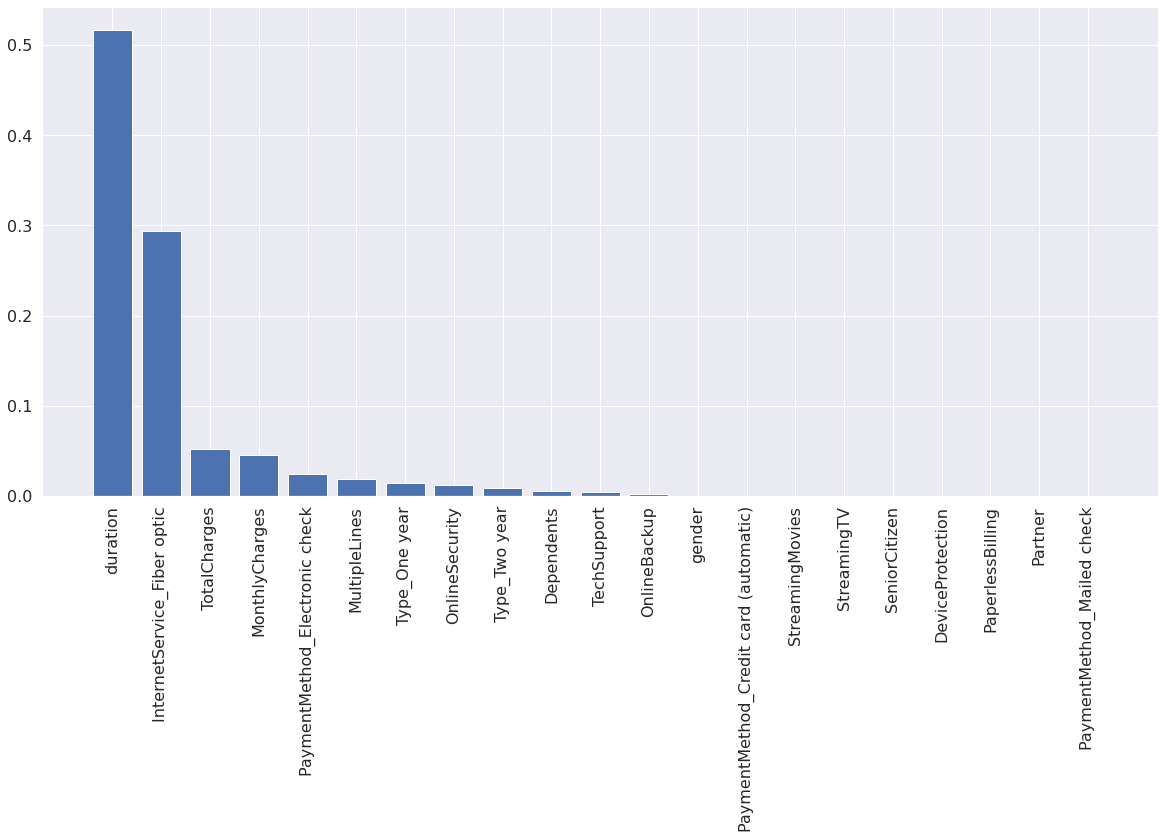

In [69]:
feature_import = DT_2_CV.feature_importances_
col_names = features_train.columns
indices = np.argsort(feature_import)[::-1]
print("Feature importances:")
for f, idx in enumerate(indices):
    print("{:2d}. feature '{:5s}' ({:.4f})".format(f + 1, col_names[idx], feature_import[idx]))
d1 = pd.Series(data =feature_import, index =col_names  ).sort_values(ascending=False)
plt.figure(figsize=(20,9))
plt.bar(d1.index,d1.values)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.xticks(rotation=90);

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>хорошо, что используешь этот инструмент. На начальном этапе мы можем нагенерить множество разных фич, в том чтисле и лишних. И вот этот инструмент, вкупе с анализом мультиколлинеарности позволяет избавляться от "балласта")

In [70]:
feature_importances = d1.iloc[:5].index
feature_importances

Index(['duration', 'InternetService_Fiber optic', 'TotalCharges',
       'MonthlyCharges', 'PaymentMethod_Electronic check'],
      dtype='object')

In [71]:
X_train = features_train[feature_importances]
X_test = features_test[feature_importances]

In [213]:
DT_2_CV = GridSearchCV(tree.DecisionTreeClassifier(class_weight='balanced'),{
                            'max_depth': range(1,7),
                            'min_samples_split' : range(6,32, 3),
                            'min_samples_leaf' : range(3,23,2)
                             },
                             cv = 5,
                             scoring = 'roc_auc',
                              n_jobs=-1)

In [214]:
DT_2_CV.fit(X_train, target_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'max_depth': range(1, 7),
                         'min_samples_leaf': range(3, 23, 2),
                         'min_samples_split': range(6, 32, 3)},
             scoring='roc_auc')

In [215]:
best_params_DT_2_CV= DT_2_CV.best_params_
print('best_params_DT_2_CV =', best_params_DT_2_CV)

best_params_DT_2_CV = {'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 6}


In [72]:
best_params_DT_2_CV = {'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 6}

In [73]:
%%time
DT_2_CV = tree.DecisionTreeClassifier(**best_params_DT_2_CV, random_state =13)

DT_2_CV.fit(features_train, target_train)

DT_2_CV_Prediction_Proba = DT_2_CV.predict_proba(features_train)[:,1]
DT_2_CV_Predictions = DT_2_CV.predict(features_train)


DT_2_CV_roc = roc_auc_score(target_train, DT_2_CV_Prediction_Proba)
DT_2_CV_acc = accuracy_score(target_train, DT_2_CV_Predictions)
print('DT_2_CV_roc =',DT_2_CV_roc )
print('DT_2_CV_acc =',DT_2_CV_acc )

DT_2_CV_roc = 0.8569256788422901
DT_2_CV_acc = 0.8146964856230032
CPU times: user 24.8 ms, sys: 7 µs, total: 24.8 ms
Wall time: 24.9 ms


In [74]:
DT_2_CV_Prediction_Proba = DT_2_CV.predict_proba(features_test)[:,1]
DT_2_CV_Predictions = DT_2_CV.predict(features_test)


DT_2_CV_roc = roc_auc_score(target_test, DT_2_CV_Prediction_Proba)
DT_2_CV_acc = accuracy_score(target_test, DT_2_CV_Predictions)
print('DT_2_CV_roc =',DT_2_CV_roc )
print('DT_2_CV_acc =',DT_2_CV_acc )

DT_2_CV_roc = 0.8542146983071192
DT_2_CV_acc = 0.8048261178140526


При оптимальных гиперпараметрах на тестовой выборке было получено значение целевой метрики - 0,85.

### Random Forest

In [75]:
%%time
RFC = RandomForestClassifier(class_weight = 'balanced', random_state = 13)

RFC.fit(features_train, target_train)

RFC_Prediction_Proba = RFC.predict_proba(features_train)[:,1]
RFC_Predictions = RFC.predict(features_train)

RFC_roc = roc_auc_score(target_train, RFC_Prediction_Proba)
RFC_acc = accuracy_score(target_train, RFC_Predictions)
print('roc_auc =', RFC_roc )
print('RFC_acc =', RFC_acc )

roc_auc = 0.9999889151971831
RFC_acc = 0.9989350372736954
CPU times: user 719 ms, sys: 3.8 ms, total: 723 ms
Wall time: 722 ms


Feature importances:
 1. feature 'duration' (0.2095)
 2. feature 'TotalCharges' (0.1738)
 3. feature 'MonthlyCharges' (0.1720)
 4. feature 'Type_Two year' (0.0592)
 5. feature 'InternetService_Fiber optic' (0.0490)
 6. feature 'PaymentMethod_Electronic check' (0.0366)
 7. feature 'Type_One year' (0.0303)
 8. feature 'OnlineSecurity' (0.0258)
 9. feature 'PaperlessBilling' (0.0246)
10. feature 'gender' (0.0236)
11. feature 'TechSupport' (0.0222)
12. feature 'Partner' (0.0204)
13. feature 'Dependents' (0.0202)
14. feature 'OnlineBackup' (0.0193)
15. feature 'SeniorCitizen' (0.0184)
16. feature 'MultipleLines' (0.0183)
17. feature 'DeviceProtection' (0.0180)
18. feature 'StreamingTV' (0.0167)
19. feature 'StreamingMovies' (0.0166)
20. feature 'PaymentMethod_Credit card (automatic)' (0.0131)
21. feature 'PaymentMethod_Mailed check' (0.0124)


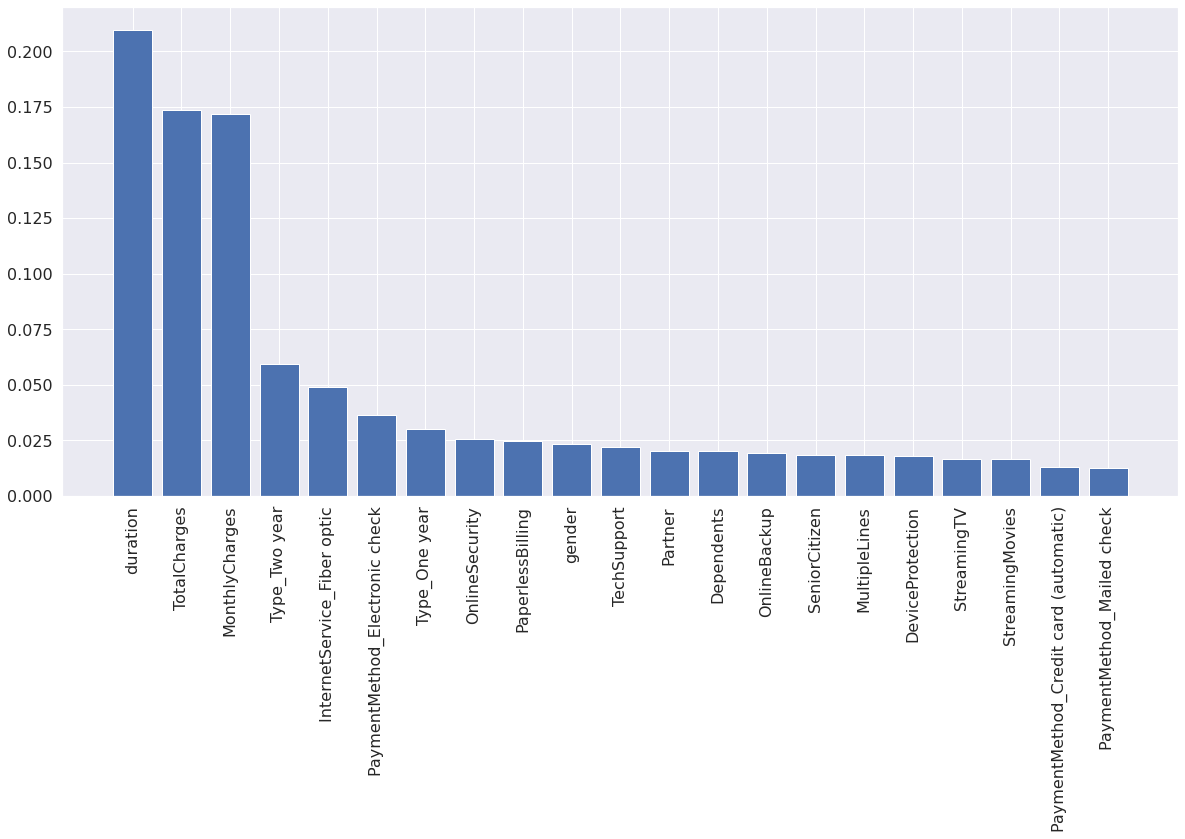

In [76]:
feature_import2 = RFC.feature_importances_
col_names = features_train.columns
indices = np.argsort(feature_import2)[::-1]
print("Feature importances:")
for f, idx in enumerate(indices):
    print("{:2d}. feature '{:5s}' ({:.4f})".format(f + 1, col_names[idx], feature_import2[idx]))
d1 = pd.Series(data =feature_import2, index =col_names  ).sort_values(ascending=False)
plt.figure(figsize=(20,9))
plt.bar(d1.index,d1.values)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.xticks(rotation=90);

In [77]:
feature_importances = d1.iloc[:15].index
feature_importances

Index(['duration', 'TotalCharges', 'MonthlyCharges', 'Type_Two year',
       'InternetService_Fiber optic', 'PaymentMethod_Electronic check',
       'Type_One year', 'OnlineSecurity', 'PaperlessBilling', 'gender',
       'TechSupport', 'Partner', 'Dependents', 'OnlineBackup',
       'SeniorCitizen'],
      dtype='object')

In [78]:
rfc_X_train = features_train[feature_importances]

In [79]:
rfc_X_test = features_test[feature_importances]

In [155]:
RFC_2_fi_CV = GridSearchCV(RandomForestClassifier(criterion = 'entropy', class_weight='balanced'),{
                            'max_depth': range(6,10),
                            'n_estimators': range(30,70, 10),
                            'min_samples_split' : range(16,32,4),
                            'min_samples_leaf' : range(3,13,3)},
                             cv = 5,
                             scoring = 'roc_auc',
                              n_jobs=-1)

In [156]:
%%time
RFC_2_fi_CV.fit(rfc_X_train,target_train)

CPU times: user 3min 13s, sys: 878 ms, total: 3min 14s
Wall time: 3min 15s


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              criterion='entropy'),
             n_jobs=-1,
             param_grid={'max_depth': range(6, 10),
                         'min_samples_leaf': range(3, 13, 3),
                         'min_samples_split': range(16, 32, 4),
                         'n_estimators': range(30, 70, 10)},
             scoring='roc_auc')

In [157]:
best_params_RFC_2_fi_CV= RFC_2_fi_CV.best_params_
print('best_params_RFC_2_fi_CV =', best_params_RFC_2_fi_CV)

best_params_RFC_2_fi_CV = {'max_depth': 9, 'min_samples_leaf': 6, 'min_samples_split': 28, 'n_estimators': 40}


In [80]:
best_params_RFC_2_fi_CV = {'max_depth': 9, 'min_samples_leaf': 6, 'min_samples_split': 28, 'n_estimators': 40}

In [158]:
RFC_2_fi_CV.best_score_

0.8575103819050577

In [81]:
%%time
RFC_2_fi_CV = RandomForestClassifier(**best_params_RFC_2_fi_CV, random_state =13)

RFC_2_fi_CV.fit(rfc_X_train, target_train)

RFC_2_fi_CV_Prediction_Proba = RFC_2_fi_CV.predict_proba(rfc_X_train)[:,1]
RFC_2_fi_CV_Predictions = RFC_2_fi_CV.predict(rfc_X_train)


RFC_2_fi_CV_roc = roc_auc_score(target_train, RFC_2_fi_CV_Prediction_Proba)
RFC_2_fi_CV_acc = accuracy_score(target_train, RFC_2_fi_CV_Predictions)
print('RFC_2_fi_CV_roc =',RFC_2_fi_CV_roc )
print('RFC_2_fi_CV_acc =',RFC_2_fi_CV_acc )

RFC_2_fi_CV_roc = 0.8976571943222988
RFC_2_fi_CV_acc = 0.8372381966631168
CPU times: user 219 ms, sys: 0 ns, total: 219 ms
Wall time: 221 ms


In [82]:
RFC_2_fi_CV_Prediction_Proba = RFC_2_fi_CV.predict_proba(rfc_X_test)[:,1]
RFC_2_fi_CV_Predictions = RFC_2_fi_CV.predict(rfc_X_test)
RFC_2_fi_CV_roc = roc_auc_score(target_test, RFC_2_fi_CV_Prediction_Proba)
RFC_2_fi_CV_acc = accuracy_score(target_test, RFC_2_fi_CV_Predictions)
print('RFC_2_fi_CV_roc_test =',RFC_2_fi_CV_roc )
print('RFC_2_fi_CV_acc_test =',RFC_2_fi_CV_acc )

RFC_2_fi_CV_roc_test = 0.8670925958340628
RFC_2_fi_CV_acc_test = 0.8197303051809794


Для модели Random Forest было получено значение метрики - 0,867.

### LGBMClassifier

In [83]:
%%time
LGB = LGBMClassifier(class_weight = 'balanced', random_state = 13)

LGB.fit(features_train, target_train)

LGB_Prediction_Proba = LGB.predict_proba(features_train)[:,1]
LGB_Predictions = LGB.predict(features_train)

LGB_roc = roc_auc_score(target_train, LGB_Prediction_Proba)
LGB_acc = accuracy_score(target_train, LGB_Predictions)
print('roc_auc =', LGB_roc )
print('RFC_acc =', LGB_acc )

roc_auc = 0.9755075576348619
RFC_acc = 0.903798367057153
CPU times: user 57 s, sys: 637 ms, total: 57.6 s
Wall time: 58 s


Feature importances:
 1. feature 'duration' (1164.0000)
 2. feature 'MonthlyCharges' (557.0000)
 3. feature 'TotalCharges' (431.0000)
 4. feature 'gender' (83.0000)
 5. feature 'TechSupport' (73.0000)
 6. feature 'PaperlessBilling' (66.0000)
 7. feature 'PaymentMethod_Credit card (automatic)' (62.0000)
 8. feature 'OnlineSecurity' (54.0000)
 9. feature 'PaymentMethod_Electronic check' (50.0000)
10. feature 'Partner' (48.0000)
11. feature 'SeniorCitizen' (45.0000)
12. feature 'StreamingTV' (45.0000)
13. feature 'OnlineBackup' (44.0000)
14. feature 'Type_Two year' (41.0000)
15. feature 'MultipleLines' (39.0000)
16. feature 'Type_One year' (38.0000)
17. feature 'StreamingMovies' (37.0000)
18. feature 'Dependents' (37.0000)
19. feature 'DeviceProtection' (36.0000)
20. feature 'PaymentMethod_Mailed check' (27.0000)
21. feature 'InternetService_Fiber optic' (23.0000)


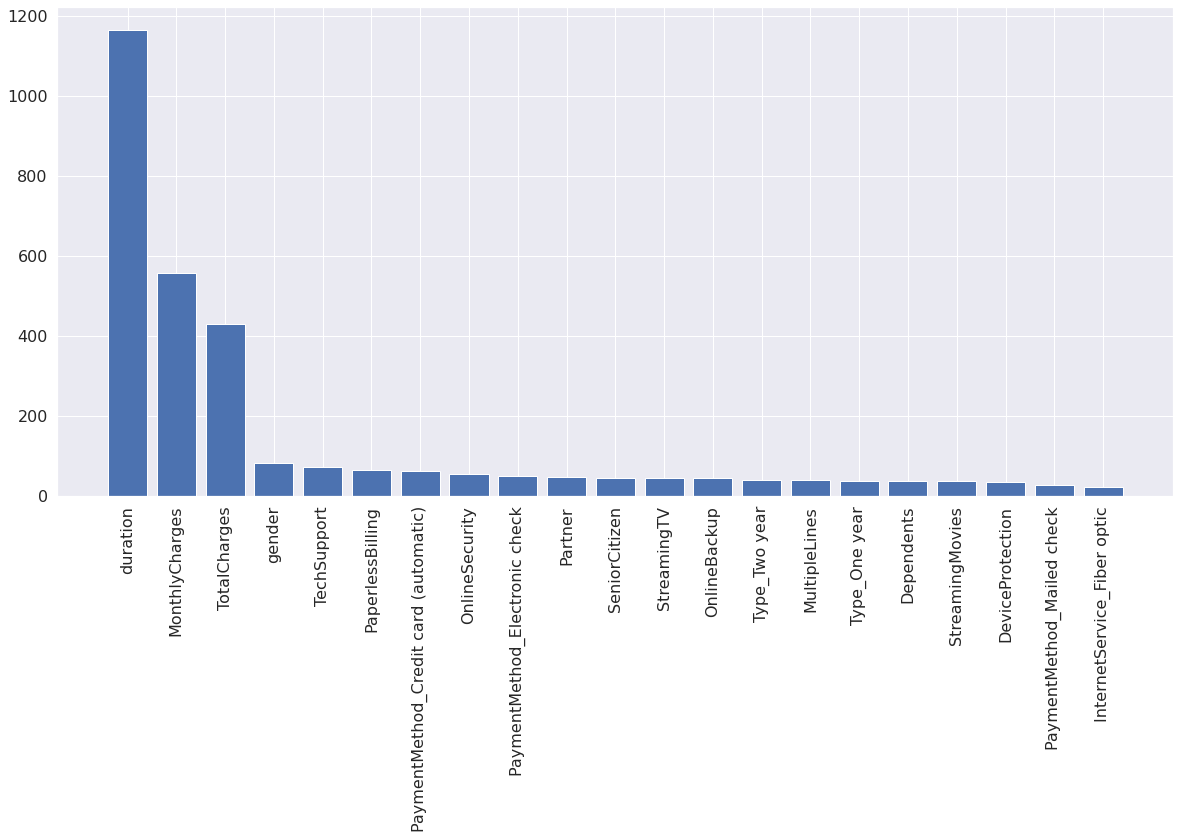

In [84]:
feature_import2 = LGB.feature_importances_
col_names = features_train.columns
indices = np.argsort(feature_import2)[::-1]
print("Feature importances:")
for f, idx in enumerate(indices):
    print("{:2d}. feature '{:5s}' ({:.4f})".format(f + 1, col_names[idx], feature_import2[idx]))
d1 = pd.Series(data =feature_import2, index =col_names  ).sort_values(ascending=False)
plt.figure(figsize=(20,9))
plt.bar(d1.index,d1.values)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.xticks(rotation=90);

In [85]:
feature_importances = d1.iloc[:10].index
feature_importances

Index(['duration', 'MonthlyCharges', 'TotalCharges', 'gender', 'TechSupport',
       'PaperlessBilling', 'PaymentMethod_Credit card (automatic)',
       'OnlineSecurity', 'PaymentMethod_Electronic check', 'Partner'],
      dtype='object')

In [86]:
lgb_X_train = features_train[feature_importances]
lgb_X_test = features_test[feature_importances]

In [187]:
lgb_2_fi_CV = GridSearchCV(LGBMClassifier(class_weight='balanced'),{
                            'max_depth': range(3,6),
                            'n_estimators': range(10,30, 10)},
                            #'min_samples_split' : range(4,28,4),
                            #'min_samples_leaf' : range(3,13,2)},
                             cv = 5,
                             scoring = 'roc_auc',
                              n_jobs=-1)

In [188]:
%%time
lgb_2_fi_CV.fit(lgb_X_train,target_train)

CPU times: user 4.8 s, sys: 48.2 ms, total: 4.85 s
Wall time: 4.82 s


GridSearchCV(cv=5, estimator=LGBMClassifier(class_weight='balanced'), n_jobs=-1,
             param_grid={'max_depth': range(3, 6),
                         'n_estimators': range(10, 30, 10)},
             scoring='roc_auc')

In [189]:
best_params_lgb_2_fi_CV= lgb_2_fi_CV.best_params_
print('best_params_lgb_2_fi_CV =', best_params_lgb_2_fi_CV)

best_params_lgb_2_fi_CV = {'max_depth': 5, 'n_estimators': 20}


In [87]:
best_params_lgb_2_fi_CV = {'max_depth': 5, 'n_estimators': 20}

In [88]:
%%time
lgb_2_fi_CV = LGBMClassifier(**best_params_lgb_2_fi_CV, random_state =13)

lgb_2_fi_CV.fit(lgb_X_train, target_train)

lgb_2_fi_CV_Prediction_Proba = lgb_2_fi_CV.predict_proba(lgb_X_train)[:,1]
lgb_2_fi_CV_Predictions = lgb_2_fi_CV.predict(lgb_X_train)


lgb_2_fi_CV_roc = roc_auc_score(target_train, lgb_2_fi_CV_Prediction_Proba)
lgb_2_fi_CV_acc = accuracy_score(target_train, lgb_2_fi_CV_Predictions)
print('lgb_2_fi_CV_roc =',lgb_2_fi_CV_roc )
print('lgb_2_fi_CV_acc =',lgb_2_fi_CV_acc )

lgb_2_fi_CV_roc = 0.8843908045040163
lgb_2_fi_CV_acc = 0.8390131345402911
CPU times: user 9.68 s, sys: 206 ms, total: 9.89 s
Wall time: 10.1 s


In [89]:
lgb_2_fi_CV_Prediction_Proba = lgb_2_fi_CV.predict_proba(lgb_X_test)[:,1]
lgb_2_fi_CV_Predictions = lgb_2_fi_CV.predict(lgb_X_test)


lgb_2_fi_CV_roc = roc_auc_score(target_test, lgb_2_fi_CV_Prediction_Proba)
lgb_2_fi_CV_acc = accuracy_score(target_test, lgb_2_fi_CV_Predictions)
print('lgb_2_fi_CV_roc_test =',lgb_2_fi_CV_roc )
print('lgb_2_fi_CV_acc_test =',lgb_2_fi_CV_acc )

lgb_2_fi_CV_roc_test = 0.8628803980895703
lgb_2_fi_CV_acc_test = 0.8147622427253371


С помощью данной модели полученное на тестовой выборке значение составило - 0,862.

## Вывод

В ходе работы была выполнена предобработка исходный данных: категоризация признаков, изменение типов данных, извлечение целевого признака.<br>
Построены модели для прогнозирования оттока клиентов. Наибольшее значение ROC AUC на тестовой выборке было получено с помощью Random Forest - 0.867, accuracy около 0,815.

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>
ОК, Олеся, скажу, что уверенная работа, на мой взгляд)<br>
Обработка данных, размышления над факторами, многогранная модельная работа, конечные результаты - многое удалось как надо<br> 
А что совсем хорошо, так это то, что не стал гнаться за точностью любой ценой, даже ценой наружения бизнес-логики. (это я про даты-признаки, многие их вставляют...)<br>

Прежде, чем идти дальше, напомню из прошлых наших общений основные моменты, которые бы мне хотелось зафиксировать, как важные для момделирования (что-то ты и так хорошо используешь):<br>   
1) F1, Акураси и AUC - отличные метрики, но нужно держать в голове, что это лишь бобщённые характеристики. А в реальной практике бизнесу часто важно знать детали самой ошибки - из каких ошибок/успехов она складывается. И в этом случае очень кстати будут меры полноты и точности. Рассмотри возможность их использования для своих проектов. Только через них можно выйти на финансовые возможности модели. Ведь перед запуском её в бой, будет сравнение стоимости создания и поддержки модели со стомостью "оставить как есть" 
    
2) При анализе факторов влияния (их зависиомть между собой и на целевую) происходит по одному из трёх алгоритмов, исходя из типа шкалы. Могут применять следующие графический и аналитический анализы:<br>
- колличественная-колличественная: аналитически методод - корреляции, графический - скатерплот.<br>
- колличественная-номинальная: аналитически методод - проверка гипотез (стьюдент, маннауитни), графический - боксплот.<br>
- номинальная-номинальная: аналитически методод - Хи-квадрат, графический - круговая диаграмма<br>
Это я к тому разделу, который посвящён анализу данных. Там ты сделал интересные предположения и чтобы их доказать, стои проверить аналитически. Вот как раз те методы проверки гипотез, что выше написал.<br>
    
3) Алгоритм нахождения модели может быть таким:<br>
- изучаем проблематику бизнеса и самой темы (в данном случае отток). Пытаемся понять суть явления.<br>
- генерируем разные факторы влияния - любые.<br>
- дизайнируем (прикидываем модели) какие методы решения есть, чтобы решить проблему.<br>
- Смотрим, какие данные и в какой шкале есть. Что нужно ещё, что применить выбранный метод.<br>
- Оцениваем мультиколлинеарность.<br>
- строим модели и анализируем те фактры, какие сгенерировали ранее.<br>
- Думаем над тем, какие причины (факторы) могут ещё влиять на отток.<br>
- если после нескольких итераций точность "замирает" - значит достигли потолка)<br>
 
4) Проведение анализа важности факторов с помощью команды feature_importances_ (+графический анализ). Отличная вещь намечается: высока я метрика + график рейтинаг факторов по силе влияния на целевой признак). Важнейшая часть любого модельного финала. Если видно, что часть факторов - слабозначимые для модели. Т.е. не значительно влияют на целевую переменную, то их смело можно убирать из модели. Ну и для бизнеса доносить: так мол и так - на эти факторы надо обращать внимание, а эти не влияют на уход клиента.<br><br><br>

В общем-то, вопросов у меня и нет особых) Кроме комментария по корреляции - посмотри, пожалуйста.<br>
Возможно, что у тебя остались/появились?

## Отчет

<div class="alert alert-success">
<h2> Комментарий тимлида<a class="tocSkip"> </h2>
<hr>
Олеся, привет! :) Сразу хочу сказать, что тобой достигнут хороший результат, достигнутое качество приносит тебе необходимое число очков для успешного прохождения спринта, 5 S.P., а ещё и время осталось. Поэтому поздравляю тебя с успешным прохождением финального спринта, молодец! :)
    
Отлично, что есть отсылка к плану, детализация действий и, в заключении, написано, какое качество мы получили для лучшей модели. И про accuracy не забыла :)
    
Про сложности я тебя понял, да, duration тут, наверное, ключевой момент. Здорово, что также тобой были использованы не все признаки, выбирались наиболее «сильные», слабые признаки могут являться шумами, снижать качество модели. Хорошие способы повысить качество модели. С ключевыми шагами ОК, тут ты опять отсылаешься к плану решения, но в общих чертах, мне кажется, что в твоём решении ключевыми шагами для решения были как раз те вещи, которые помогли достигнуть необходимого результата. Хотя и без приведенных шагов достичь его бы не получилось :)
    
Интересно, что для лучшей модели тобой приведены показатели на обучающей выборке и на тестовой, что можно сказать, глядя на эти цифры? <details>
    <summary><u>Нажми на меня</u></summary>
	Модель получилась устойчивой и не выглядет переобученной, качество на тесте и обучении довольно близко к друг другу и высоко при этом. То, что на известных модели данных качество выше, это ОК, а то, что выше незначительно — здорово. Тут либо тестовая выборка получилась похожа на обучающие данные, либо получено устойчивое решение, которое будет хорошо работать на новых данных.
</details>
    
Приглашаю тебя на финальный вебинар спринта, детали которого я объявлю позже в канале Slack :)
</div>


**Какие пункты плана были выполнены, а какие — нет (поясните почему)?**<br>
Все пункты из плана были выполнены. На первом этапе  была выполнена предобработка данных - предварительный анализ данных, категоризация переменных, проверка датасета на наличие дубликатов, обработка пропусков.<br>
Далее на датасете были обучены модели машинного обучения:SGDClassifier, DecisionTreeClassifier, RandomForest, XGBoost, LightGBM, CatBoost. В результате моделями с наибольшей точностью оказались: DecisionTreeClassifier, RandomForestClassifier, XGBClassifier. Наибольшая точность на тестовой выборке - XGBClassifier. Также высокая точность получилась с помощью LGBMClassifier, но обучение этой модели занимает значительно больше времени, поэтому далее она не была рассмотрена.<br>
На завершающем этапе был выполнен подбор гиперпараметров для моделей. В результате наибольшее значение ROC AUC на тестовой выборке было получено с помощью Random Forest - 0.867, accuracy около 0,815.

**Какие трудности возникли и как вы их преодолели?**<br>
В процессе выполнения проекта возникла сложность с получением нужного результата по целевой метрике. Для того, чтобы решить эту проблему в датасет был добавлен признак duration (количество дней, которые клиент пользуется услугами компании).
Кроме того, для построения итоговой модели был выполнен анализ важности факторов с помощью команды feature_importances_, что также позволило повысить качество итоговой модели. 


**Какие ключевые шаги в решении задачи выделили?**<br>
Для решения данной задачи было 4 шага: предобработка данных, выбор модели, подбор гиперпараметров и подведение итогов.

**Какая ваша итоговая модель и какое у неё качество?**
Итоговая модель - RandomForest, ROC AUC на обучающей выборке - 0,88, accuracy - 0,84. На тестовой выборке: ROC AUC - 0.867, accuracy около 0,815.